In [2]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [3]:
# reading the CSV file into pandas dataframe
cement_df = pd.read_csv("concrete.csv")

# Qustion:1 Exploratory data quality report
Deliverable -1 : a. Univariate analysis

In [4]:
# Check top few records to get a feel of the data structure
cement_df.head(2)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   

   strength  
0     29.89  
1     23.51

In [5]:
cement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [15]:
#5 point summary of numerical attributes and this incudes central values (mean and median), standard deviation and quartiles.
cement_df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [9]:
#Based on the problem statement
#cement 	slag	ash	water	superplastic	coarseagg	fineagg 	age -> Independent varibales
#strength -> dependent varibale 

In [10]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 
#Based on below output,no missing values present.
cement_df[cement_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [26]:
#Checking sckewness of data
cement_df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

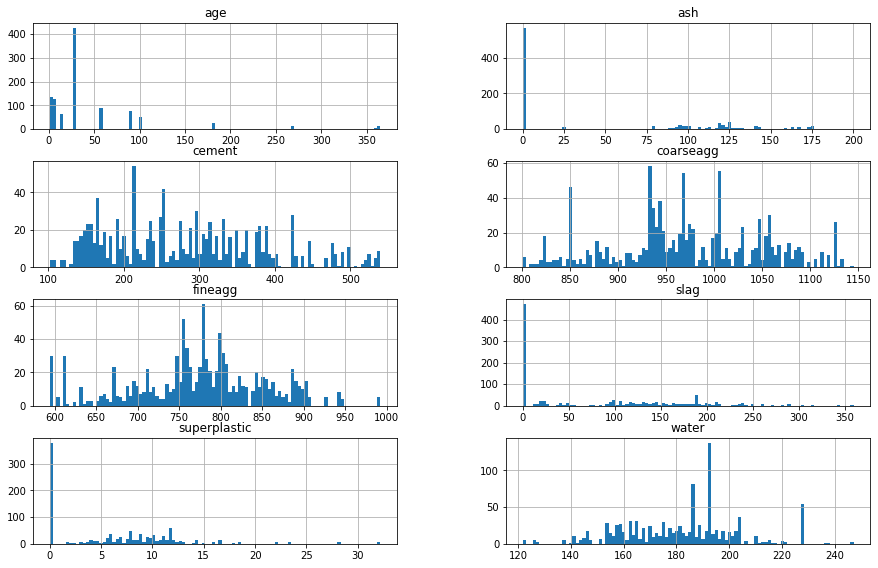

In [23]:
#Data distrubution of all features using histogram.

columns = list(cement_df)[0:-1] # 
cement_df[columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 

In [24]:
#By looking  histogram and 5 point summary, slag,water,superplastic and age having outliers

# Deliverable -1
b. Multivariate analysis 

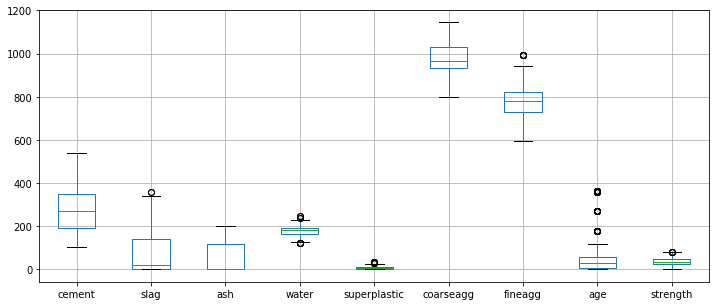

In [25]:
#Box Plot for indepedent and dependent varibales
cement_df.boxplot(figsize=(12,5)) 

In [ ]:
#hhistograms and density curves all independent variables.

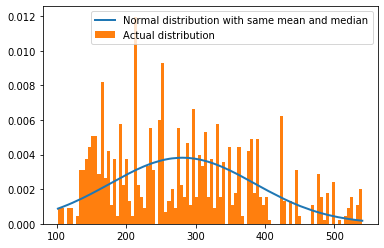

In [29]:

import scipy.stats as stats
h = np.asarray(cement_df['cement'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

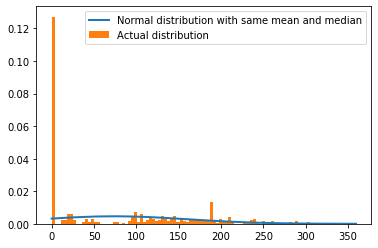

In [30]:
import scipy.stats as stats
h = np.asarray(cement_df['slag'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

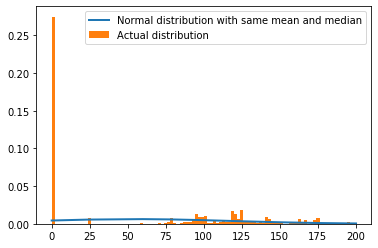

In [31]:
import scipy.stats as stats
h = np.asarray(cement_df['ash'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

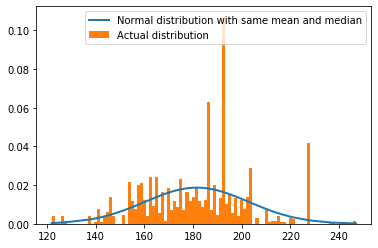

In [32]:
import scipy.stats as stats
h = np.asarray(cement_df['water'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

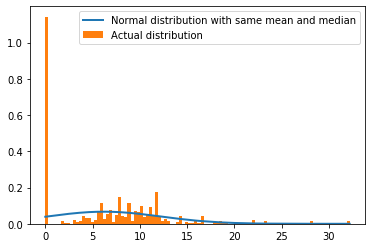

In [33]:
import scipy.stats as stats
h = np.asarray(cement_df['superplastic'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

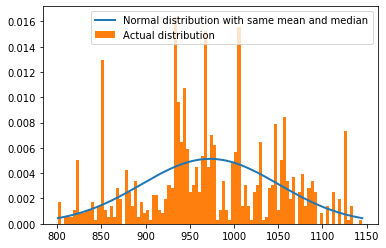

In [34]:
import scipy.stats as stats
h = np.asarray(cement_df['coarseagg'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

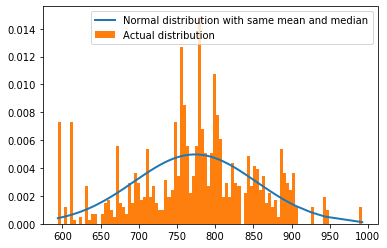

In [36]:
import scipy.stats as stats
h = np.asarray(cement_df['fineagg'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

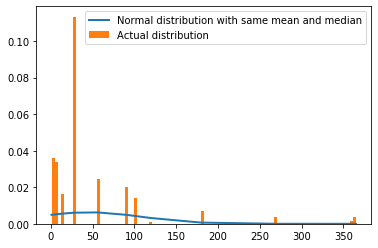

In [37]:
import scipy.stats as stats
h = np.asarray(cement_df['age'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

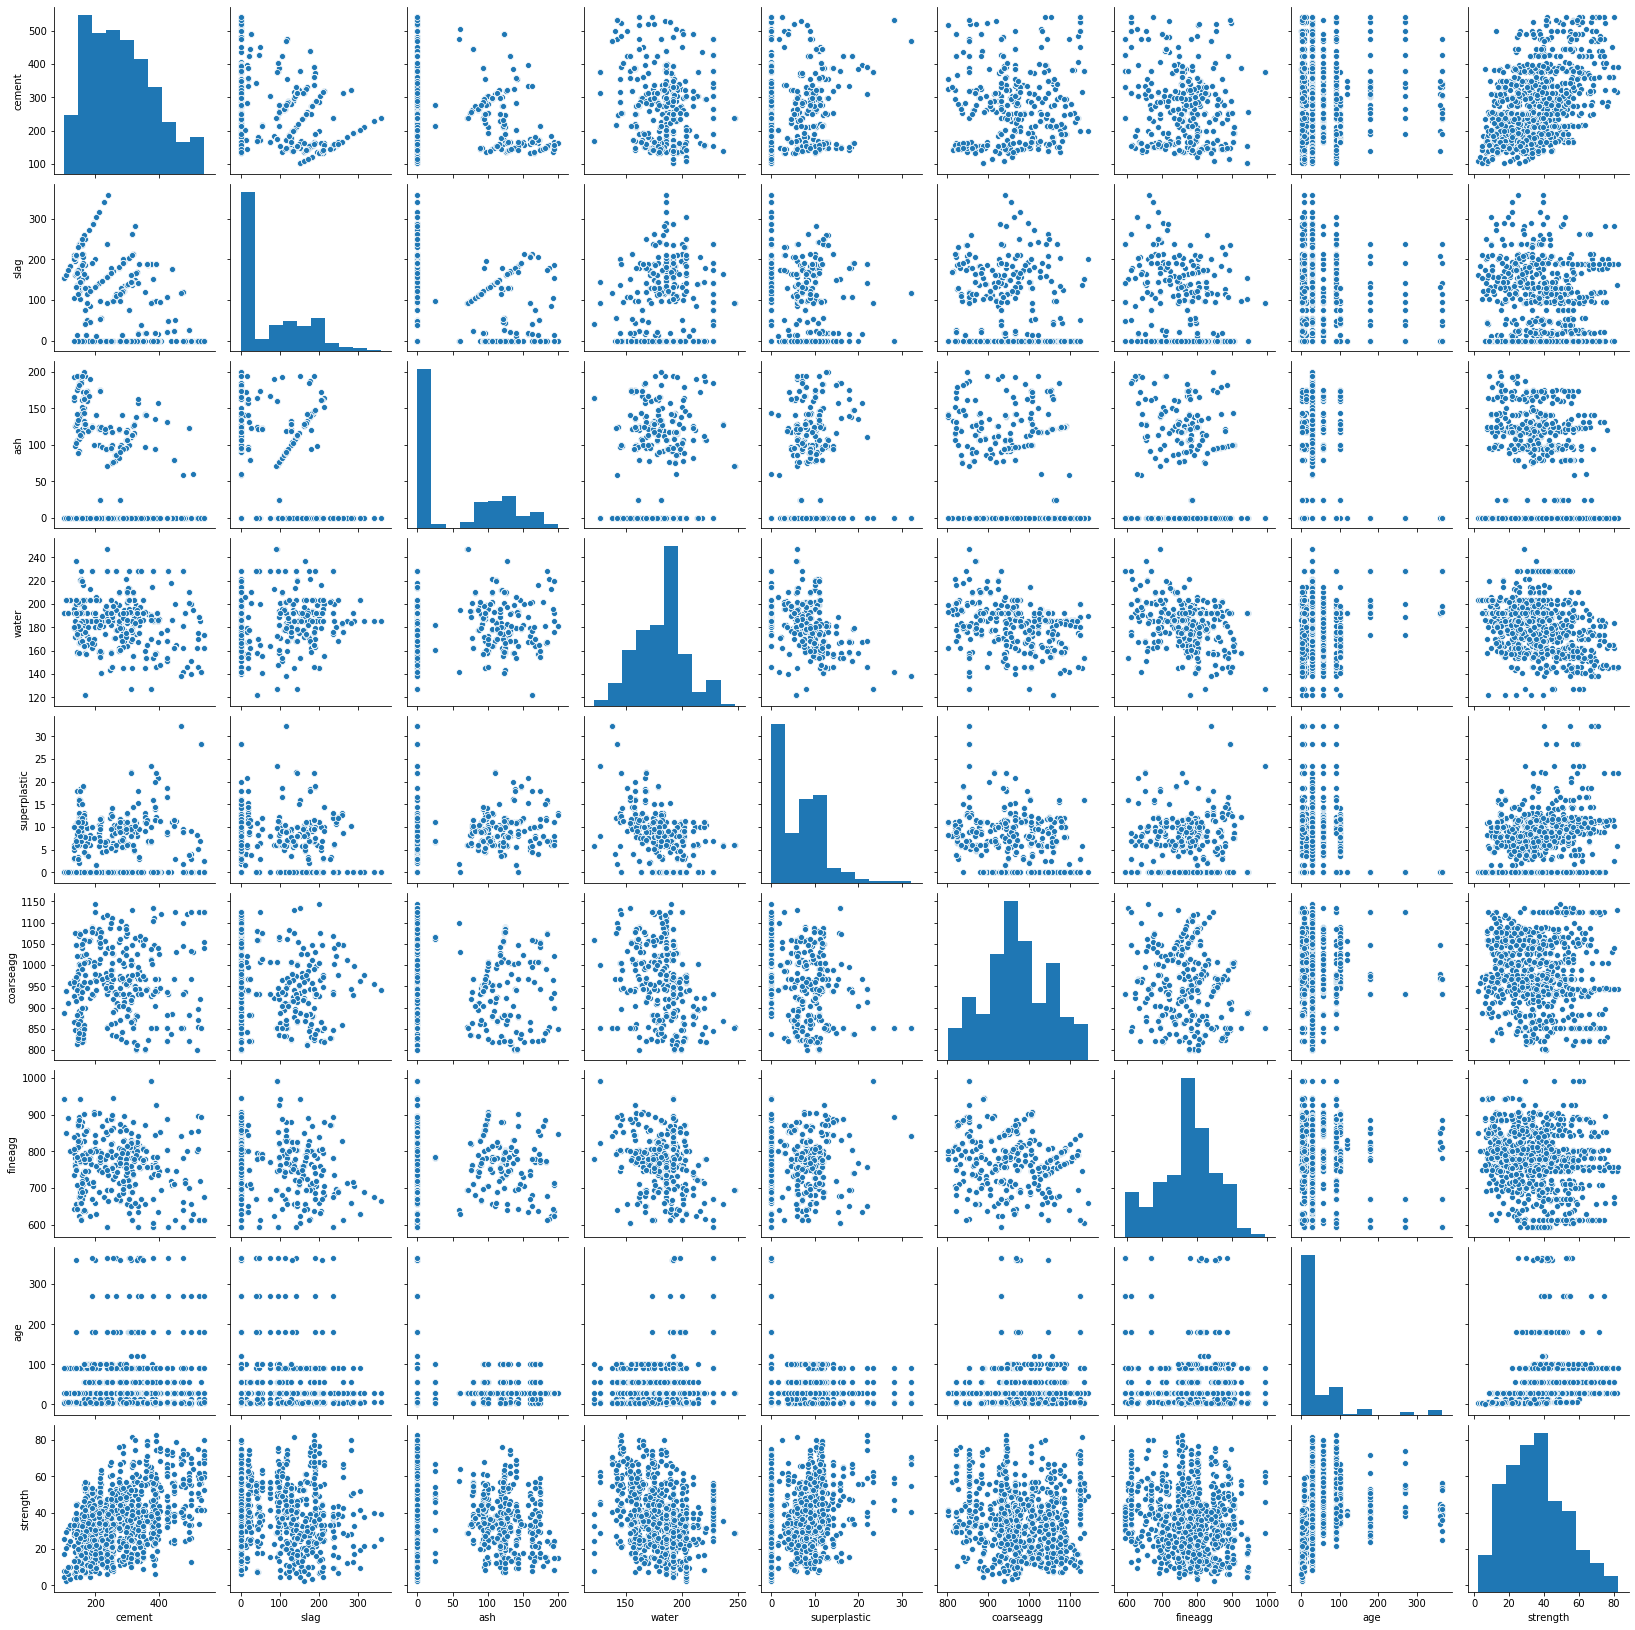

In [261]:
##Pair plot 
sns.pairplot(pd.DataFrame(cement_df))

In [ ]:
#By looking at pair plot the correlation between variables is less 

# Question :1:C
one strategy to address the presence outliers and missing values and perform necessary imputation

In [48]:
#IQR for each columns 
Q1 = cement_df.quantile(0.25)
Q3 = cement_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [51]:
cement_df.head(20)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11   173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12   385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13   237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   
15   213.8   98.1   24.5  181.7           6.7     1066.0    785.5  100   
16   237.5  237.5    0.0  228.0           0.0      932.0    594.0   28   
17   336.0    0.0    0.0  182.0           3.0      986.0    817.0   28   
18   190.7    0.0  125.4  162.1           7.8     1090.0    804.0    3   
19   312.7    0.0    0.0  178.1           8.0      999.7    822.2   28   

    strength  
0      29.89  
1      23.51  
2      29.22  
3      45.85  
4      18.29  
5      21.86  
6      15.75  
7      36.64  
8      21.65  
9      28.99  
10     36.35  
11      6.94  
12     27.92  
13     26.26  
14     23.89  
15     49.97  
16     30.08  
17     44.86  
18     15.04  
19     25.10

In [56]:
#The data point where we have False that means these values are valid whereas True indicates the presence of an outliers
boston_df_out.shape
((cement_df < (Q1 - 1.5 * IQR)) | (cement_df > (Q3 + 1.5 * IQR)))

cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      False  False  False  False         False      False    False  False   
1      False  False  False  False         False      False    False  False   
2      False  False  False  False         False      False    False  False   
3      False  False  False  False         False      False    False  False   
4      False  False  False  False         False      False    False  False   
...      ...    ...    ...    ...           ...        ...      ...    ...   
1025   False  False  False  False         False      False    False  False   
1026   False  False  False  False          True      False    False  False   
1027   False  False  False  False         False      False    False  False   
1028   False  False  False  False         False      False    False   True   
1029   False  False  False  False         False      False    False  False   

      strength  
0        False  
1        False  
2        False  
3        False  
4        False  
...        ...  
1025     False  
1026     False  
1027     False  
1028     False  
1029     False  

[1030 rows x 9 columns]

In [57]:
##After removing outliers the size of input data.
cement_df_out = cement_df[~((cement_df < (Q1 - 1.5 * IQR)) |(cement_df > (Q3 + 1.5 * IQR))).any(axis=1)]
cement_df_out.shape

(941, 9)

In [58]:
##There are multiple ways to handle outliers, like using a z score to transform data and filter based on the threshold.
#here I used IQR and filtered the rows which are outliers but it caused the data loss from 1030 rows to 941 rows which are missing/loss of information 
#So here I'm not removing any outliers in the data and moving with actual data.

# Question : 2. Deliverable -2 (Feature Engineering techniques)



Identify opportunities (if any) to create a composite feature, drop a
feature etc

In [77]:

from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA

In [78]:
# independant variables
X_pca = cement_df.drop(['strength'], axis=1)
# the dependent variable
y_pca = cement_df[['strength']]

In [82]:
#Here I'm applying PCA to create a composite feature, drop a feature for dimensionality reduction 
XScaled_pca=X_pca.apply(zscore)
XScaled_pca.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398 -0.312970   
1 -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141  0.282260   
2 -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121  1.093371   
3 -0.145209  0.465044 -0.847144  2.175461     -1.039143  -0.526517 -1.292542   
4 -1.209776  1.269798 -0.847144  0.549700      0.484905   0.958372 -0.959363   

        age  
0 -0.279733  
1 -0.501465  
2 -0.279733  
3 -0.279733  
4 -0.279733

In [83]:
covMatrix = np.cov(XScaled_pca,rowvar=False)

print(covMatrix)

[[ 1.00097182 -0.27548337 -0.39785361 -0.08166604  0.09247596 -0.10945526
  -0.22293429  0.08202566]
 [-0.27548337  1.00097182 -0.32389436  0.10735626  0.04331247 -0.28427461
  -0.28187634 -0.04428902]
 [-0.39785361 -0.32389436  1.00097182 -0.25723376  0.37787001 -0.00997051
   0.07918537 -0.15452054]
 [-0.08166604  0.10735626 -0.25723376  1.00097182 -0.65817191 -0.18247076
  -0.45109913  0.27788802]
 [ 0.09247596  0.04331247  0.37787001 -0.65817191  1.00097182 -0.26625765
   0.22290765 -0.1928873 ]
 [-0.10945526 -0.28427461 -0.00997051 -0.18247076 -0.26625765  1.00097182
  -0.17865441 -0.00301881]
 [-0.22293429 -0.28187634  0.07918537 -0.45109913  0.22290765 -0.17865441
   1.00097182 -0.1562464 ]
 [ 0.08202566 -0.04428902 -0.15452054  0.27788802 -0.1928873  -0.00301881
  -0.1562464   1.00097182]]


In [84]:
pca = PCA(n_components=8) ## 8 independent varibles
pca.fit(XScaled_pca)

PCA(n_components=8)

In [64]:
print(pca.explained_variance_) # eigen Values

[2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]


In [65]:
print(pca.components_) ## eigan vectors

[[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]


In [66]:
print(pca.explained_variance_ratio_) #The percentage of variation explained by each eigen Vector

[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021 0.00375535]


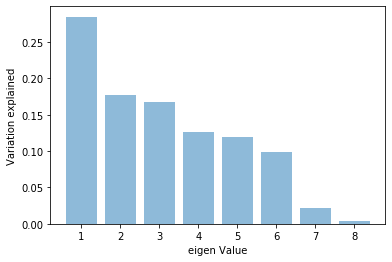

In [67]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

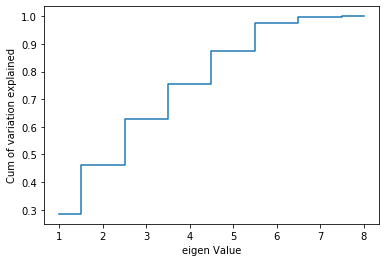

In [68]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [69]:
#Based on the above figs Now 6 dimensions seem very reasonable and can explain over 95% of the variation in the original data.

In [85]:
#Transforming orginal scaled data to 6 dimensions
pca6 = PCA(n_components=6)
pca6.fit(XScaled_pca)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled_pca)

[[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]]
[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443]


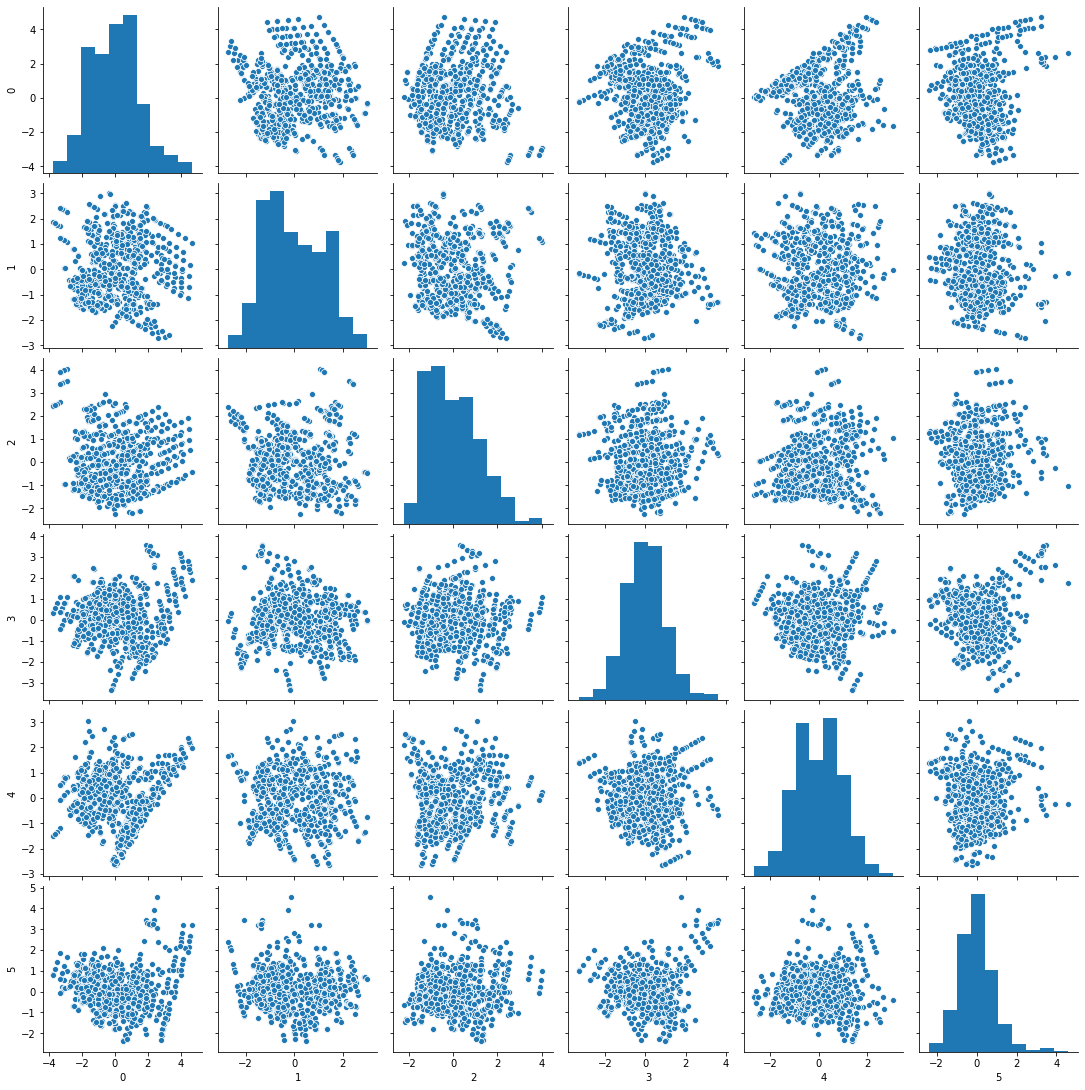

In [262]:
#By looking at pair plot all variables are independent of each other and no correlation between them
sns.pairplot(pd.DataFrame(Xpca6)) 

In [74]:
#Fit Linear Model. Let's construct two linear models. The first with all the 8 independent variables and the second with only the 6 new variables constructed using PCA

In [86]:
regression_model = LinearRegression()
regression_model.fit(XScaled_pca, y_pca)
regression_model.score(XScaled_pca, y_pca)

0.6155198704142721

In [73]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca6, y_pca)
regression_model_pca.score(Xpca6, y_pca)

0.5652542930597133

# 2.b.
Decide on complexity of the model, should it be simple linear
model in terms of parameters or would a quadratic or higher
degree help

In [87]:
#Based on the above analysis it shows that the linear model is with a 61% accuracy score which is less then we are expecting.
#So here we can try with higher-order functions such polynomial and can apply regularization methods for avoiding over/underfit on test data.

In [88]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = cement_df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = cement_df[['strength']]

In [99]:
# scale all the columns.
X_scaled_REG = preprocessing.scale(X)
X_scaled_REG = pd.DataFrame(X_scaled_REG, columns=X.columns)  

y_scaled_REG = preprocessing.scale(y)
y_scaled_REG = pd.DataFrame(y_scaled_REG, columns=y.columns)   

In [101]:
X_scaled_REG.shape

(1030, 8)

In [102]:
y_scaled_REG.shape

(1030, 1)

In [114]:
#Going with degree=3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3 , interaction_only=True)

In [117]:
X_poly = poly.fit_transform(X_scaled_REG)
X_train_REG, X_test_REG, y_train_REG, y_test_REG = train_test_split(X_poly, y_scaled_REG, test_size=0.30, random_state=1)
X_train_REG.shape

(721, 93)

In [118]:
print(X_train_REG.shape)
print(y_train_REG.shape)

(721, 93)
(721, 1)


In [119]:
print(X_test_REG.shape)
print(y_test_REG.shape)

(309, 93)
(309, 1)


In [120]:
regression_model.fit(X_train_REG, y_train_REG)
print(regression_model.coef_[0])

[-1.11146580e-16  8.44419603e-01  6.75486655e-01  5.16163849e-01
 -1.03939916e-01  2.74931668e-01  7.56794299e-02  1.30153233e-01
  1.10437751e+00 -3.86210724e-02  1.05818673e-01 -3.05717076e-02
 -2.30302672e-02 -1.68182312e-02  1.42749096e-01 -1.08059984e-01
  2.23205884e-01  1.35349102e-02 -7.76038323e-02 -5.37027670e-02
  1.17259239e-01  1.03014922e-01  7.67563157e-02 -1.77727334e-01
 -8.42253631e-03  2.65539745e-01  2.82211405e-01 -1.69127487e-02
 -1.07204021e-01  7.16879837e-03 -4.39499022e-01  6.43749543e-02
 -7.81138483e-02  1.97245536e-01  9.21002633e-02 -3.67565939e-01
 -3.32969195e-01  5.43352117e-02  7.74807120e-02 -3.52449556e-02
 -1.71000778e-02  5.59192446e-03 -1.50854566e-01  2.44948915e-02
 -7.78006041e-02  9.84715273e-03  5.01840615e-02  2.34346899e-01
  2.31687846e-01  4.49408271e-02  4.58441888e-02 -2.38827254e-01
  3.99755035e-02  4.79310524e-02 -3.70808321e-01  3.18502096e-02
 -1.37958769e-01  6.23809397e-03  2.09588233e-01 -9.20126084e-02
  1.33195394e-01  1.43829

In [ ]:
#Applying regulation methods 

In [122]:

ridge = Ridge(alpha=.3)
ridge.fit(X_train_REG,y_train_REG)
#print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3)

In [123]:
print(ridge.score(X_train_REG,y_train_REG))
print(ridge.score(X_test_REG,y_test_REG))

0.8160284603745862
0.7219421699914274


In [124]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_REG,y_train_REG)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.01)

In [125]:
print(lasso.score(X_train_REG,y_train_REG))
print(lasso.score(X_test_REG,y_test_REG))

0.7749780964118144
0.7469850755959571


In [126]:
#So by using regulation methods lasso and Ridge along with higher degree function it gives the highest accuracy compared to a simple linear model and could avoid over/underfitting

# Question:2:C
Explore for gaussians. If data is likely to be a mix of gaussians,
explore individual clusters and present your findings in terms of the
independent attributes and their suitability to predict strength

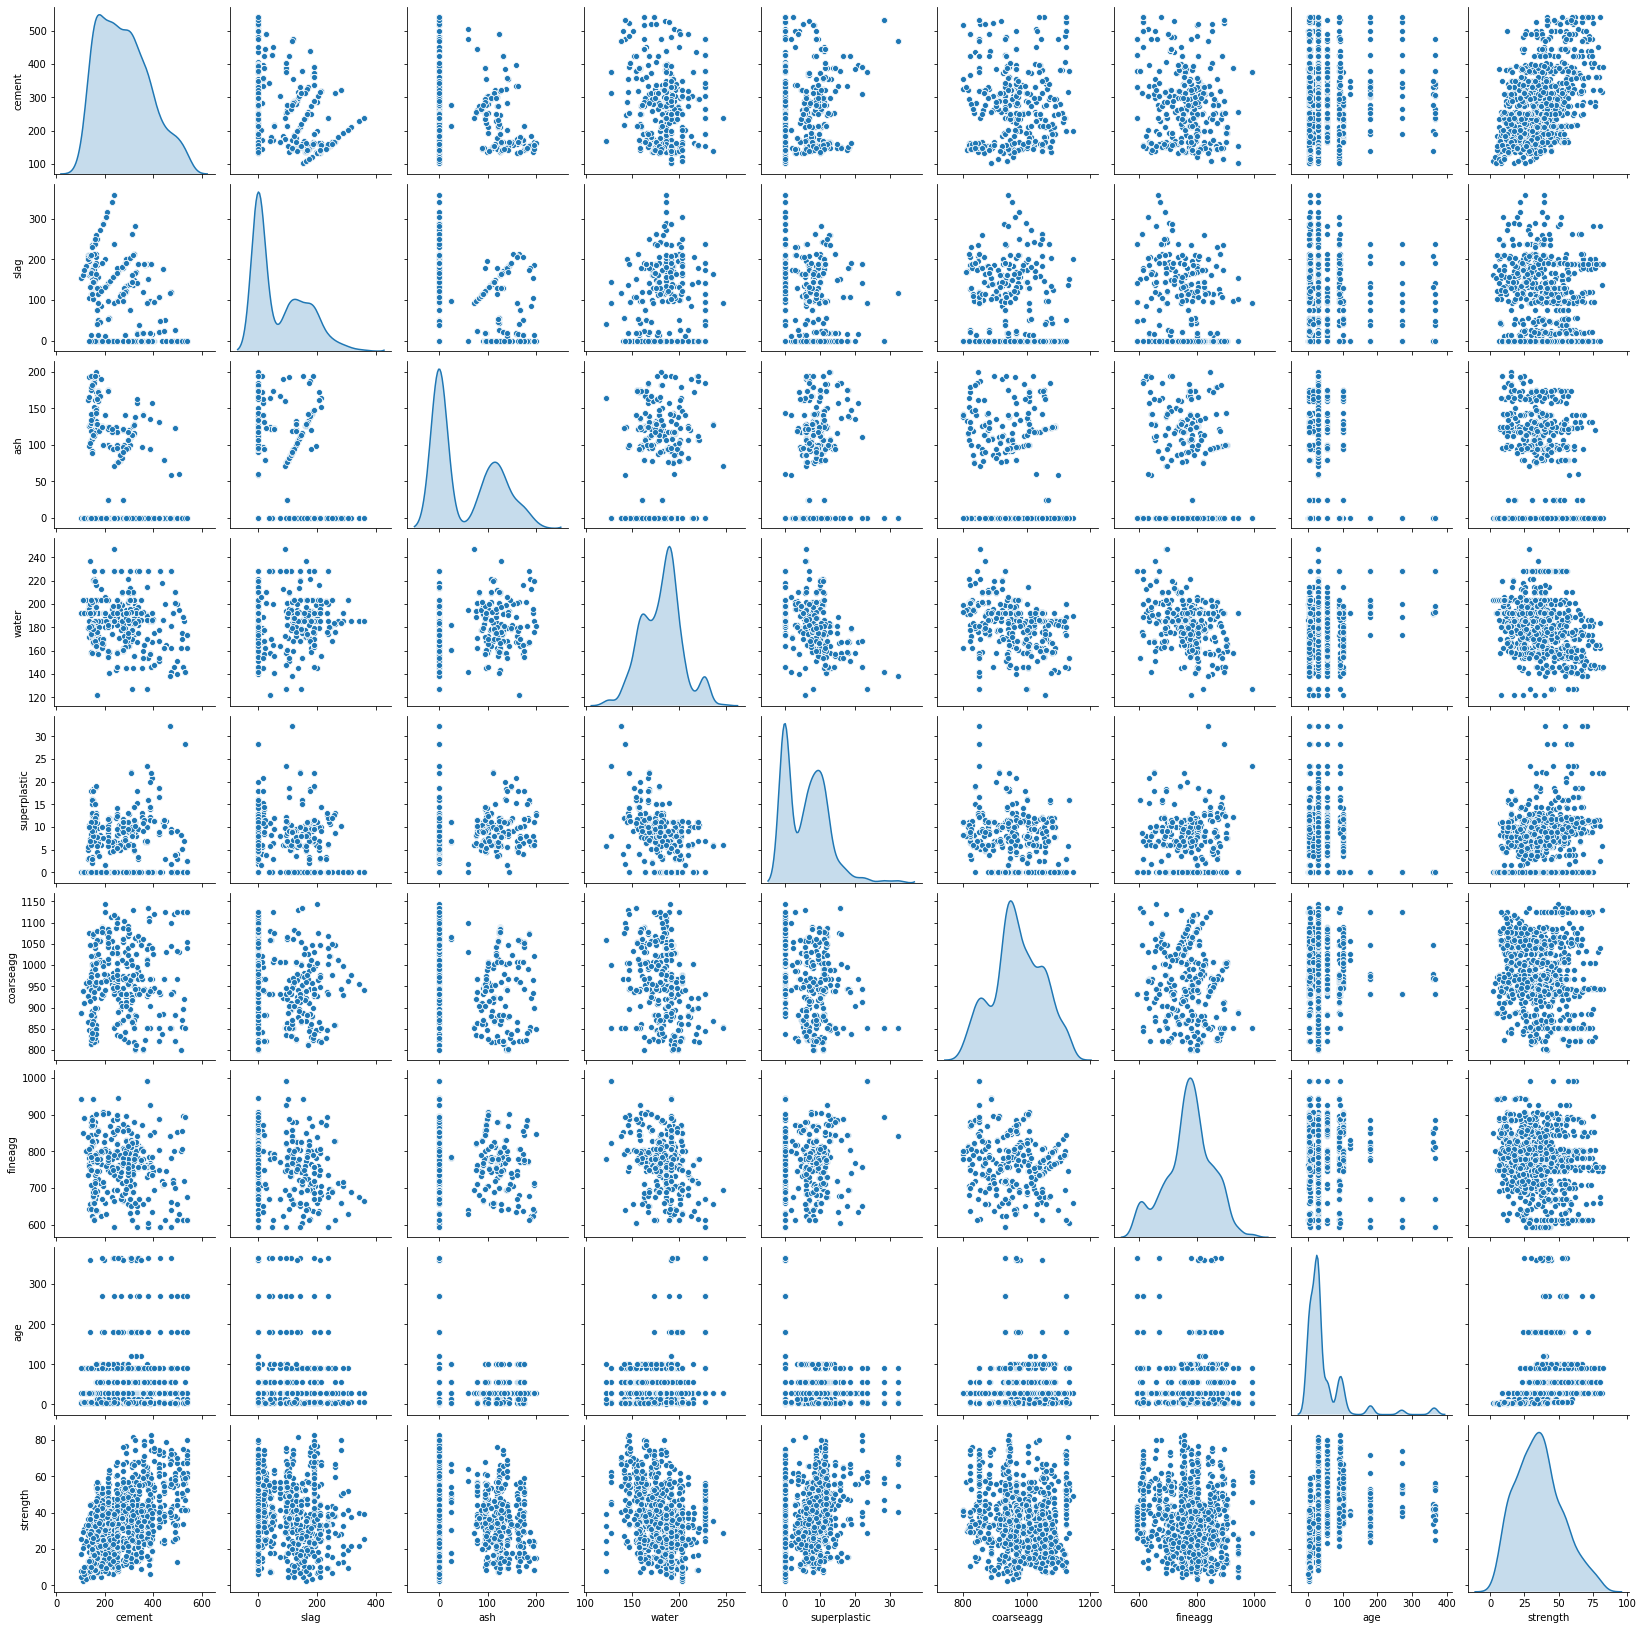

In [266]:
sns.pairplot(pd.DataFrame(cement_df),diag_kind='kde')

In [127]:
## expect 3 to 4 clusters from the pair plot visual inspection and gussians. hence restricting clusters from 2 to 6 

cluster_range = range( 2, 6 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cement_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2    3.147316e+07
1             3    2.499578e+07
2             4    2.198916e+07
3             5    1.997717e+07

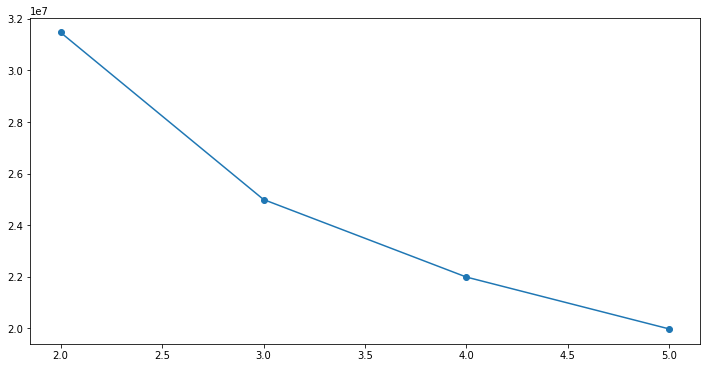

In [128]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [129]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let's start with 3 clusters

In [131]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

cement_df_attr = cement_df.loc[:, 'cement':'strength']
cement_df_attr_z = cement_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(cement_df_attr_z)

prediction=cluster.predict(cement_df_attr_z)
cement_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record



In [132]:
cement_df_attr_z

cement      slag       ash     water  superplastic  coarseagg  \
0    -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398   
1    -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141   
2    -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121   
3    -0.145209  0.465044 -0.847144  2.175461     -1.039143  -0.526517   
4    -1.209776  1.269798 -0.847144  0.549700      0.484905   0.958372   
...        ...       ...       ...       ...           ...        ...   
1025 -1.399330 -0.856888  1.747988 -0.073430      0.635635  -0.153365   
1026  2.394626 -0.856888 -0.847144 -1.863173      3.683731  -1.554617   
1027 -0.045645  0.488235  0.564545 -0.092171      0.451410  -1.323005   
1028  0.582373 -0.416244 -0.847144  2.175461     -1.039143  -0.526517   
1029  2.477915 -0.856888 -0.847144 -0.401393     -1.039143   1.956877   

       fineagg       age  strength  GROUP  
0    -0.312970 -0.279733 -0.355018      1  
1     0.282260 -0.501465 -0.737108      0  
2     1.093371 -0.279733 -0.395144      0  
3    -1.292542 -0.279733  0.600806      1  
4    -0.959363 -0.279733 -1.049727      1  
...        ...       ...       ...    ...  
1025  0.392072 -0.279733 -1.349171      0  
1026  1.498926 -0.675683  0.328312      2  
1027 -0.065893 -0.279733  0.506781      2  
1028 -1.292542  3.553066  1.152381      1  
1029 -2.003823 -0.612331  1.005654      1  

[1030 rows x 10 columns]

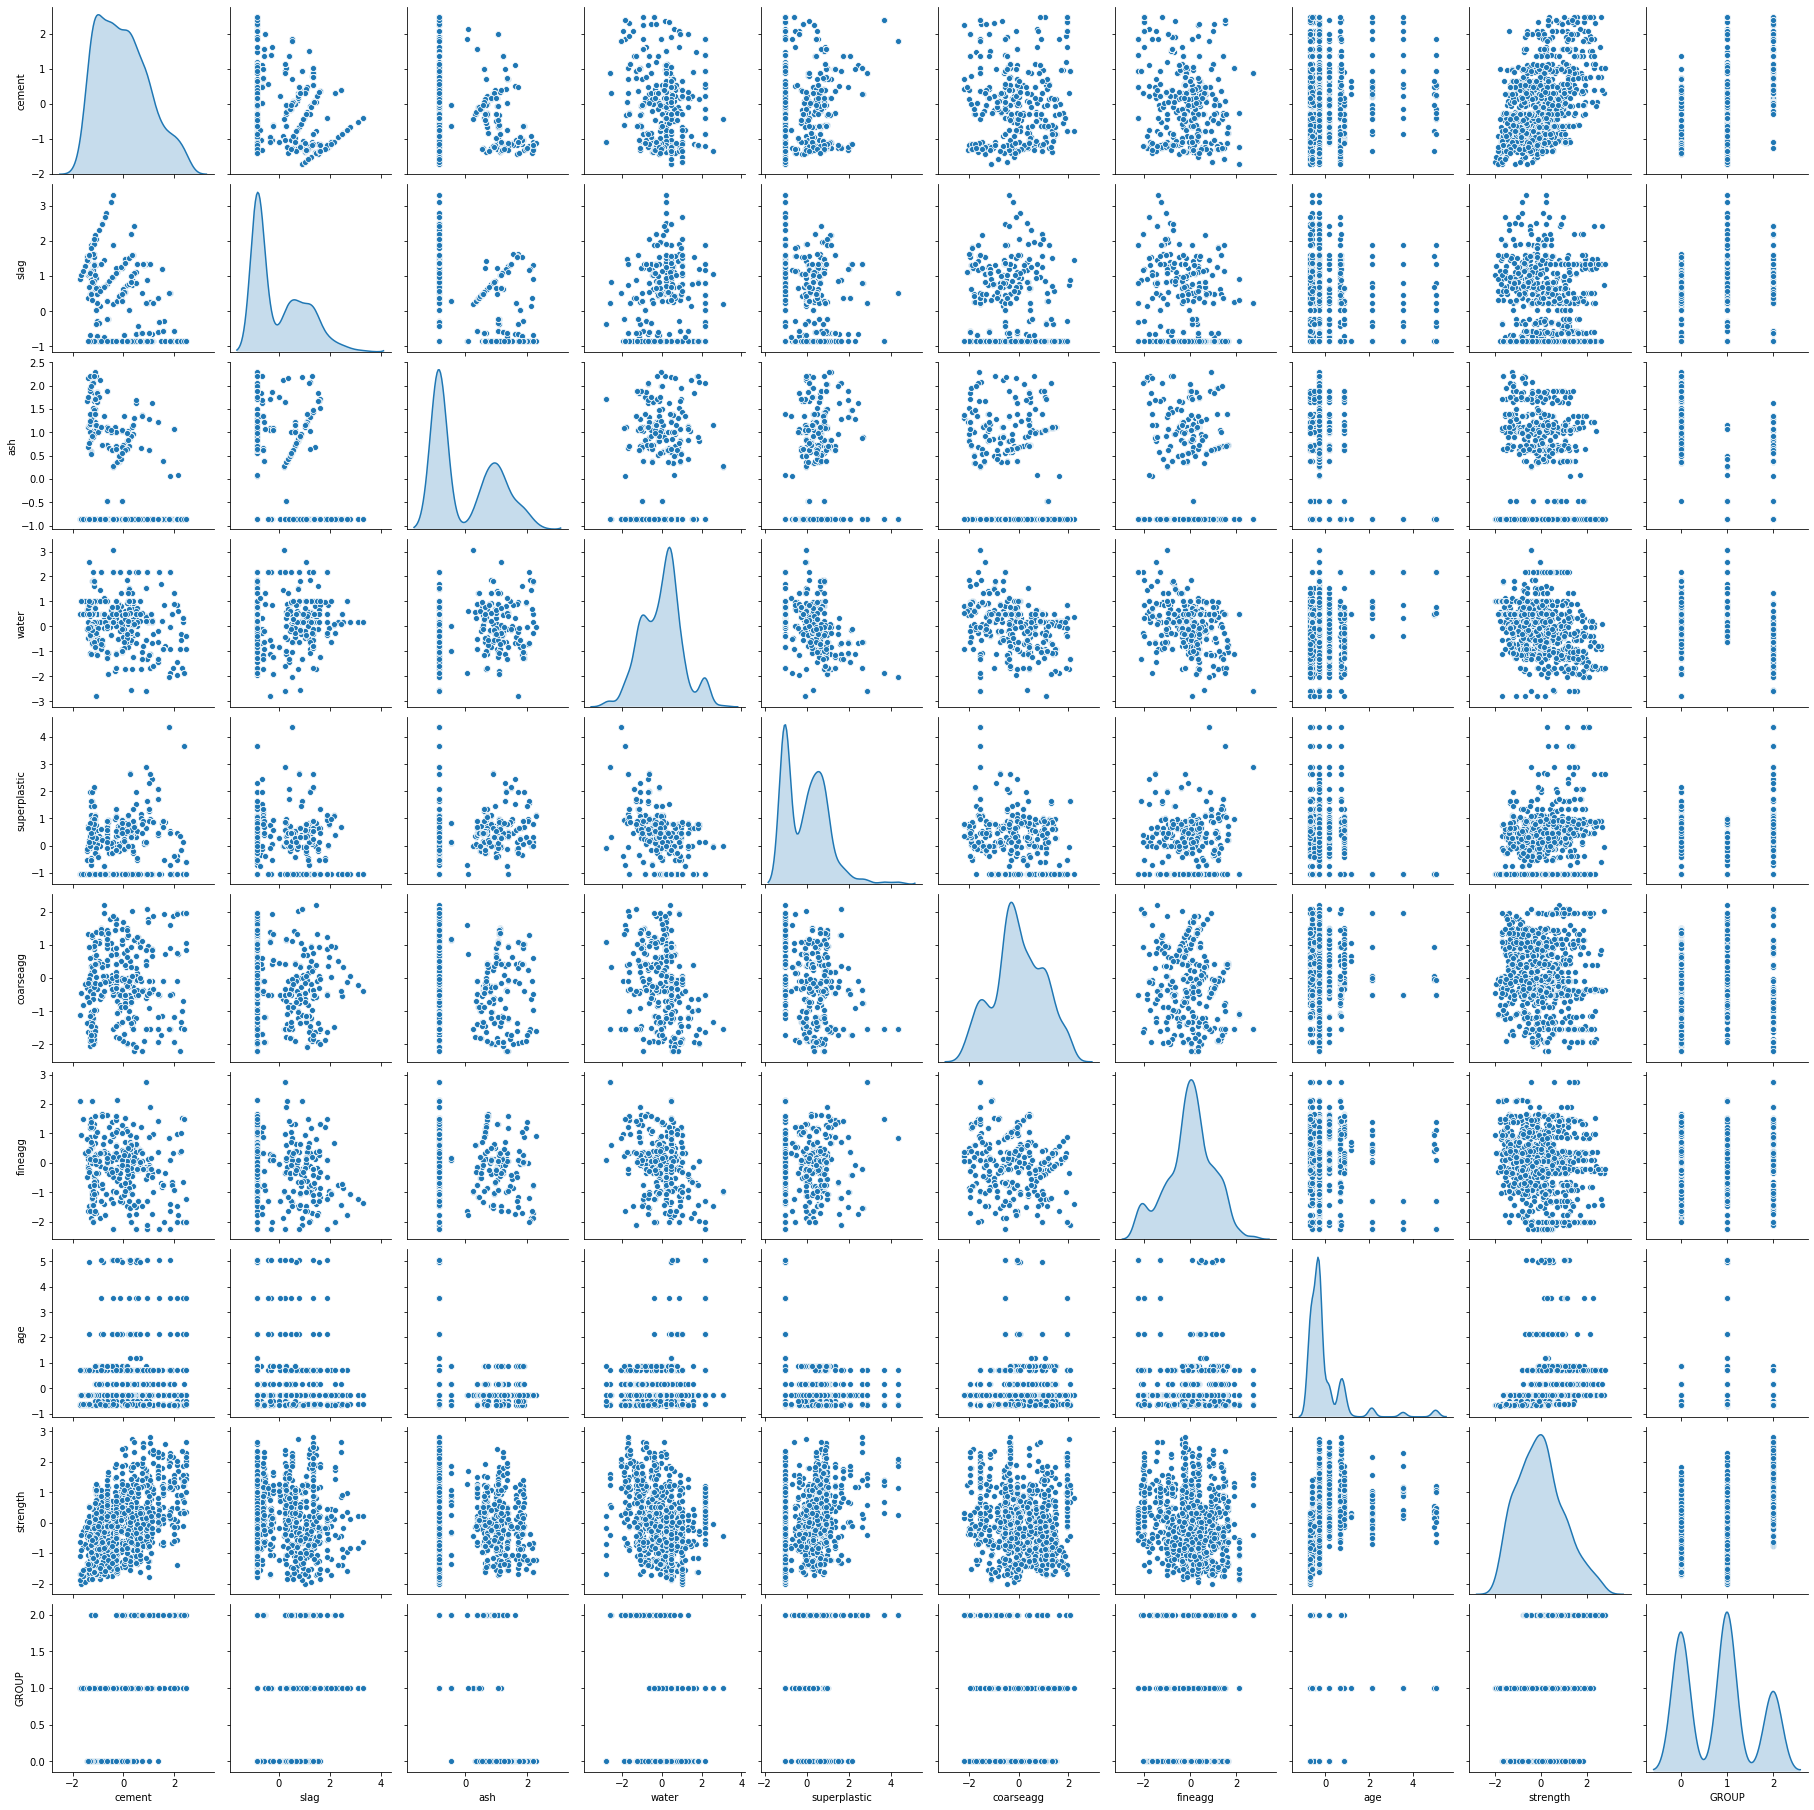

In [265]:
sns.pairplot(cement_df_attr_z, diag_kind='kde')

In [133]:
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cement_df_attr) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.623752 -0.422305  1.140949 -0.294326      0.413407   0.103214  0.232929   
1  0.053629  0.131591 -0.796305  0.691792     -0.878202   0.250036 -0.268517   
2  0.977892  0.472820 -0.401924 -0.862369      1.025597  -0.676074  0.128384   

        age  strength  
0 -0.166903 -0.242958  
1  0.245482 -0.356208  
2 -0.197419  1.129904

In [134]:
## Instead of interpreting the numerical values of the centroids, let's do a visual analysis by converting the centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266E4940848>,
      dtype=object)

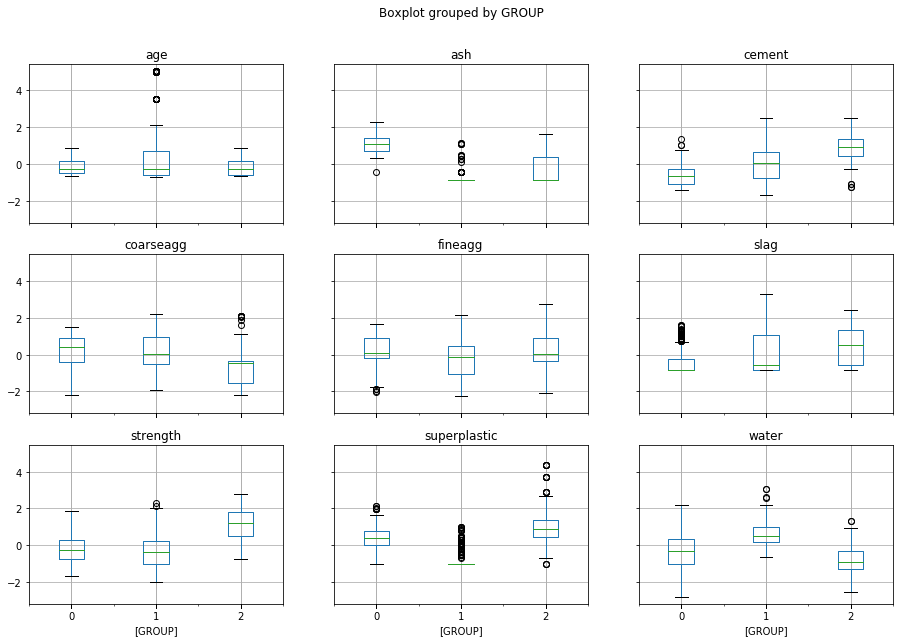

In [135]:
import matplotlib.pylab as plt

cement_df_attr_z.boxplot(by = 'GROUP',  figsize=(15, 10))

In [136]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indicated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now 

In [167]:
cor = cement_df.corr()
cor

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

In [169]:
cor[cor >.90] ## here based on this filtering their are no columns highly corrleated between them.(90% of correleation)

cement  slag  ash  water  superplastic  coarseagg  fineagg  age  \
cement           1.0   NaN  NaN    NaN           NaN        NaN      NaN  NaN   
slag             NaN   1.0  NaN    NaN           NaN        NaN      NaN  NaN   
ash              NaN   NaN  1.0    NaN           NaN        NaN      NaN  NaN   
water            NaN   NaN  NaN    1.0           NaN        NaN      NaN  NaN   
superplastic     NaN   NaN  NaN    NaN           1.0        NaN      NaN  NaN   
coarseagg        NaN   NaN  NaN    NaN           NaN        1.0      NaN  NaN   
fineagg          NaN   NaN  NaN    NaN           NaN        NaN      1.0  NaN   
age              NaN   NaN  NaN    NaN           NaN        NaN      NaN  1.0   
strength         NaN   NaN  NaN    NaN           NaN        NaN      NaN  NaN   

              strength  
cement             NaN  
slag               NaN  
ash                NaN  
water              NaN  
superplastic       NaN  
coarseagg          NaN  
fineagg            NaN  
age                NaN  
strength           1.0

In [149]:
#Let's analyze the strength column vs other columns group wise

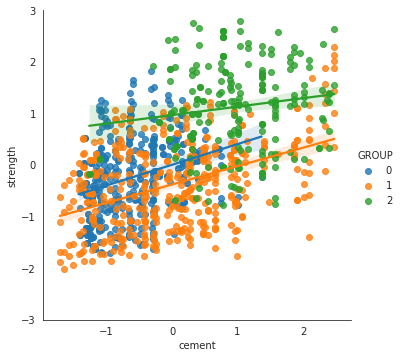

In [155]:
# strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

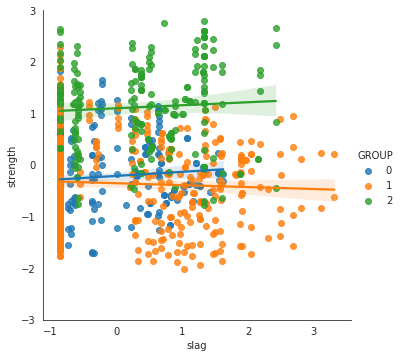

In [157]:
# strength Vs slag

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

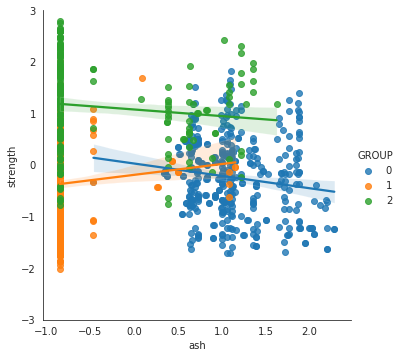

In [158]:
# strength Vs ash

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

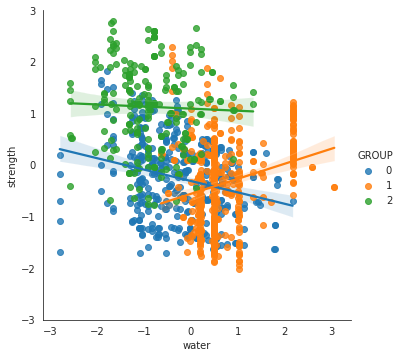

In [159]:
# strength Vs water

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

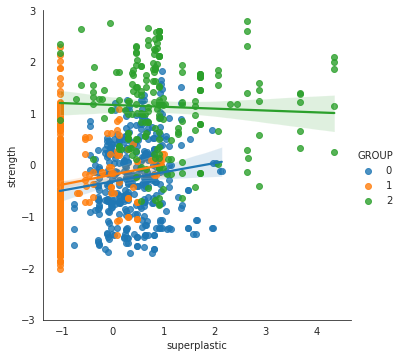

In [160]:
# strength Vs superplastic

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

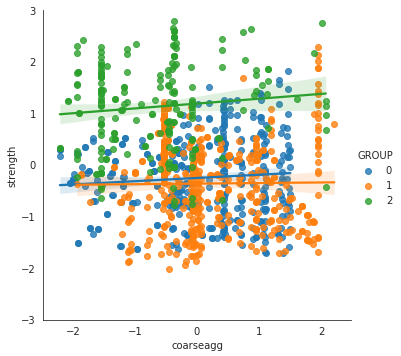

In [161]:
# strength Vs coarseagg

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

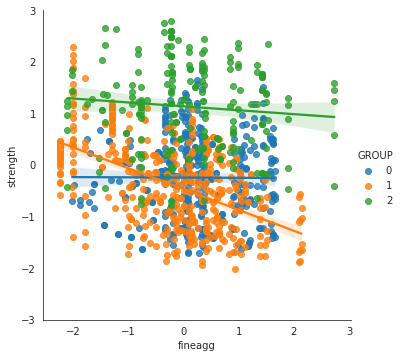

In [162]:
# strength Vs fineagg

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

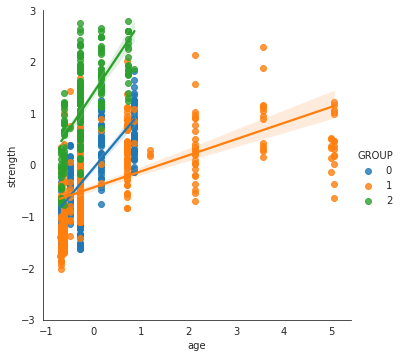

In [163]:
# strength Vs age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_df_attr_z, hue='GROUP')
plot.set(ylim = (-3,3))

In [164]:
#So based on the above figs, there is a lot of spread.

# Question : 3
Deliverable -3:a  Obtain feature importance for the individual features and present
your findings

In [180]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = cement_df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = cement_df[['strength']]

# scale all the columns.
X_scaled_FE_IMP = preprocessing.scale(X)
X_scaled_FE_IMP = pd.DataFrame(X_scaled_FE_IMP, columns=X.columns)  

y_scaled_FE_IMP = preprocessing.scale(y)
y_scaled_FE_IMP = pd.DataFrame(y_scaled_FE_IMP, columns=y.columns) 

X_train_FE_IMP, X_test_FE_IMP, y_train_FE_IMP, y_test_FE_IMP = train_test_split(X_scaled_FE_IMP, y_scaled_FE_IMP, test_size=0.30, random_state=1)

In [186]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_FE_IMP, y_train_FE_IMP)
score_dt = dt.score(X_test_FE_IMP, y_test_FE_IMP)


print(f"Decision tree acccuracy score: {score_dt}")


Decision tree acccuracy score: 0.8667967975660259


In [189]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_FE_IMP, y_train_FE_IMP)
score_rf = rf.score(X_test_FE_IMP, y_test_FE_IMP)


print(f"Random forest acccuracy score: {score_rf}")


Random forest acccuracy score: 0.9049757870977608


In [190]:
# Important features sorted based on their importnace  - Decision Tree
pd.Series(dt.feature_importances_, X_train_FE_IMP.columns ).sort_values(ascending= False)

cement          0.347676
age             0.333421
water           0.122610
slag            0.096154
coarseagg       0.034136
fineagg         0.033327
superplastic    0.019900
ash             0.012777
dtype: float64

In [191]:
# Important features sorted based on their importnace  - Random forest
pd.Series(rf.feature_importances_, X_train_FE_IMP.columns ).sort_values(ascending= False)

age             0.348717
cement          0.316764
water           0.107615
slag            0.069506
superplastic    0.066671
fineagg         0.038943
coarseagg       0.027170
ash             0.024615
dtype: float64

# 4. Deliverable -4 (Tuning the model)

Algorithms that you think will be suitable for this project

In [194]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = cement_df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = cement_df[['strength']]

# scale all the columns
X_scaled_ALG_IMP = preprocessing.scale(X)
X_scaled_ALG_IMP = pd.DataFrame(X_scaled_ALG_IMP, columns=X.columns)  

y_scaled_ALG_IMP = preprocessing.scale(y)
y_scaled_ALG_IMP = pd.DataFrame(y_scaled_ALG_IMP, columns=y.columns) 

X_train_ALG_IMP, X_test_ALG_IMP, y_train_ALG_IMP, y_test_ALG_IMP = train_test_split(X_scaled_ALG_IMP, y_scaled_ALG_IMP, test_size=0.30, random_state=1)

In [267]:
#Linear regression 

regression_model = LinearRegression()
regression_model.fit(X_train_ALG_IMP, y_train_ALG_IMP)
score_lin_reg=regression_model.score(X_test_ALG_IMP, y_test_ALG_IMP)
print(f"Linear regression acccuracy score: {score_lin_reg}")

Linear regression acccuracy score: 0.6339136715208276


In [200]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_ALG_IMP, y_train_ALG_IMP)
score_dt_ALG = dt.score(X_test_ALG_IMP, y_test_ALG_IMP)


print(f"Decision tree acccuracy score: {score_dt_ALG}")


Decision tree acccuracy score: 0.8643010325726889


In [202]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_ALG_IMP, y_train_ALG_IMP)
score_rf_ALG = rf.score(X_test_ALG_IMP, y_test_ALG_IMP)


print(f"Random forest acccuracy score: {score_rf_ALG}")


Random forest acccuracy score: 0.9068950590387976


In [205]:
#support vector machines

from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_ALG_IMP, y_train_ALG_IMP)
score_svr_ALG=svr.score(X_test_ALG_IMP, y_test_ALG_IMP)

print(f"Support vector machines acccuracy score: {score_svr_ALG}")

Support vector machines acccuracy score: 0.829441315572846


In [208]:
##By looing at the above scores, Random forest, and Decision tree is giving better performance with default parameters.

# Question: 4:B:
Techniques employed to squeeze that extra performance out of
the model without making it overfit or underfit

In [268]:
#Here Random forest and Decision tree is better performance, so going these models. 
#Applying Cross Validation Score on models.

In [209]:
#For Decision Tree 

from sklearn.model_selection import cross_val_score

dt_cv = cross_val_score(dt, X_scaled_ALG_IMP, y_scaled_ALG_IMP, cv = 10).mean()
print(f'Cross validation score of Decision tree = {dt_cv}')

Cross validation score of Decision tree = 0.8665761924814868


In [269]:
#For Random forest

rf_cv = cross_val_score(rf, X_scaled_ALG_IMP, y_scaled_ALG_IMP, cv = 10).mean()
print(f'Cross validation score of Random tree = {rf_cv}')

Cross validation score of Random tree = 0.9178936867477555


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [224]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'bootstrap':[True, False],
 'n_estimators': [100]}





grid_rf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
grid_rf.fit(X_scaled_ALG_IMP, y_scaled_ALG_IMP)

grid_rf.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   32.8s finished


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [226]:
##Taking Random forest's best parameters and applying cross validation score. 
rf_tunned = RandomForestRegressor(bootstrap= False,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)

rf_tunned.fit(X_train_ALG_IMP, y_train_ALG_IMP)

rf_tunned_score = cross_val_score(rf_tunned, X_train_ALG_IMP, y_train_ALG_IMP, cv = 10).mean()


rf_tunned_score

0.8909905177400546

In [228]:
testscore_rf_tunned = rf_tunned.score(X_test_ALG_IMP, y_test_ALG_IMP)


print(f"Random forest accuracy score: {testscore_rf_tunned}")

Random forest accuracy score: 0.8922830950664797


In [229]:
#Based on the above model parameters tunning, it gives a better accuracy score in both train and test data sets. This makes the model prevents from underfitting or overfits in production on unseen data.

In [231]:
score_data = {'Technique' : [ 'Decision tree','Random forest', 'Support vector machines','Decision tree CV','Random forest CV','Tuned Random forest CV'],
       'Score' : [ score_dt_ALG, score_rf_ALG, score_svr_ALG,dt_cv, rf_cv, testscore_rf_tunned] }

result = pd.DataFrame(score_data)

In [232]:
result  #Models and their respective accuracy scores 

Technique     Score
0            Decision tree  0.864301
1            Random forest  0.906895
2  Support vector machines  0.829441
3         Decision tree CV  0.866576
4         Random forest CV  0.918158
5   Tuned Random forest CV  0.892283

# Deliverable -4:C
c. Model performance range at 95% confidence level

In [247]:
#Taking cross-validation scores of tuned Random forest model
rf_tunned_scores = cross_val_score(rf_tunned, X_train_ALG_IMP, y_train_ALG_IMP, cv = 10)
rf_tunned_scores

array([0.94885503, 0.88355444, 0.88961627, 0.87312233, 0.89337853,
       0.87448574, 0.85847853, 0.91274077, 0.92750142, 0.86399568])

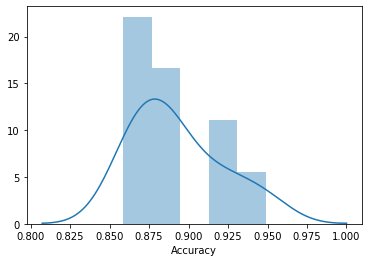

95.0 confidence interval 86.0% and 94.4%


In [259]:
from matplotlib import pyplot
sns.distplot(rf_tunned_scores,kde=True, bins=5)
plt.xlabel("Accuracy")
plt.show()
 
#for 95% confidence intervals 
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(rf_tunned_scores, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rf_tunned_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
#So based on the above plot and accuracy score, we can say that model gives 86%-94% at 95% Confidence interval